[[0.  0.  0.  1. ]
 [0.  0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.1 0.1 0. ]]
[[-0.   0.   0.   1. ]
 [ 0.  -0.6  0.   0. ]
 [ 0.   0.5 -0.1  0. ]
 [ 0.   0.1  0.1 -1. ]]


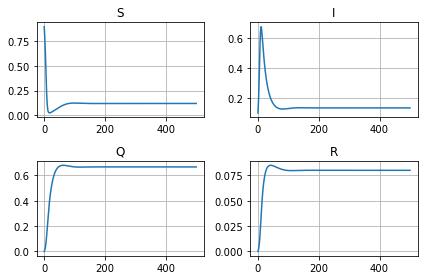

array([0.12      , 0.13333333, 0.66666667, 0.08      ])

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def Laplacian(A):
    L = np.zeros(A.shape)
    n = len(A)
    for i in range(n):
        for j in range(n):
            if i==j:
                L[i,j] = np.sum(A[:,j])
            else:
                L[i,j] = -A[i,j]
    return L

def x_dot(x,Theta, B, U_l, V_l):
    x_d = ((Theta + U_l) + np.kron(x.T,np.eye(len(x)))@(B-V_l))@x
    return x_d 


def build_B(n, B_A, Y_cal, Z_cal):
    B = np.zeros((n**2,n))

    n = len(Y_cal)

    for i, (Y_i, Z_i) in enumerate(zip(Y_cal,Z_cal)):
        if Y_i:
            for y in Y_i:
                j, k = y
                B[n*k+i, j] = B_A[j,k]
        
        if Z_i:
            for z in Z_i:
                j, k = z
                B[n*k+i, j] = -B_A[j,k]
    return B

def simulate(numsteps, dt, x0, Theta, B, control=False):
    if not control:
        U = np.zeros(Theta.shape)
        V = np.zeros(B.shape)
        
        x = x0
        xs = [x]
        for _ in range(numsteps):
            x = x + dt*x_dot(x,Theta,B,U,V)
            xs.append(x)
        return xs
    else:
        return None
        


beta,eta,sigma,gamma,delta = 5,.5,.1,.1,1
Theta_A = np.array([[0, 0,      0,   delta],
                    [0, 0,      0,     0],
                    [0, eta,    0,     0],
                    [0, gamma, sigma,  0]])

print(Theta_A)

B_A = np.array([[0,     0,  0,  0],
                [beta,  0,  0,  0],
                [0,     0,  0,  0],
                [0,     0,  0,  0]])

n = len(Theta_A)

X_cal = set([1])
O_cal = set([0,2,3])

Z_cal = [set([(1,0)]),set(),set(),set()]
Y_cal = [set(),set([(1,0)]),set(),set()]


Theta_L = -Laplacian(Theta_A)
print(Theta_L)
B_L = build_B(n, B_A, Y_cal, Z_cal)
    

x0 = np.array([.9,0.1,0,0])

numsteps = 500
dt = .1

xs = simulate(numsteps, dt, x0, Theta_L, B_L)

xs_arr = np.array(xs)
labels = ['S','I','Q','R']
plt.figure()
for i in range(n):
    plt.subplot(2,2,i+1)
    plt.plot(xs_arr[:,i])
    plt.grid()
    plt.title(labels[i])

plt.tight_layout()
plt.show()

xs[-1]


4.5

In [46]:
np.kron(x0.T,np.eye(len(x0)))@(B_L-V)@x0

array([-0.45,  0.45,  0.  ,  0.  ])

In [52]:
U = np.zeros(Theta_L.shape)
V = np.zeros(B_L.shape)

s_dot = -beta*x0[0]*x0[1] + delta*x0[3]
i_dot = beta*x0[0]*x0[1] - (eta+gamma)*x0[1]
q_dot = eta*x0[1] - sigma*x0[2]
r_dot = gamma*x0[1]+sigma*x0[2] - delta*x0[3]

x_d_check = np.array([s_dot, i_dot, q_dot, r_dot])
x_d = x_dot(x0,Theta_L,B_L,U,V)
print(x_d_check)
print(x_d)


[-0.45  0.43  0.01  0.01]
[-0.45  0.43  0.01  0.01]


In [110]:
lambdas = (Theta_A > 0).astype(int)
alphas = (B_A > 0).astype(int)



In [101]:
import pandas as pd
indices = np.array(list(np.ndindex(Theta_A.shape)))

df = pd.DataFrame({'V': Theta_A.flatten(), 'x': indices[:, 0], 'y': indices[:, 1]})

df

,V,x,y
0,0,0,0
1,0,0,1
2,0,0,2
3,1,0,3
4,0,1,0
5,0,1,1
6,0,1,2
7,0,1,3
8,0,2,0
9,10,2,1
